In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [18]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),  
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [20]:
class_name = dataset.class_names
class_name



['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 0 1 1 1 1 0 1 0 0 0 0 2 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0]


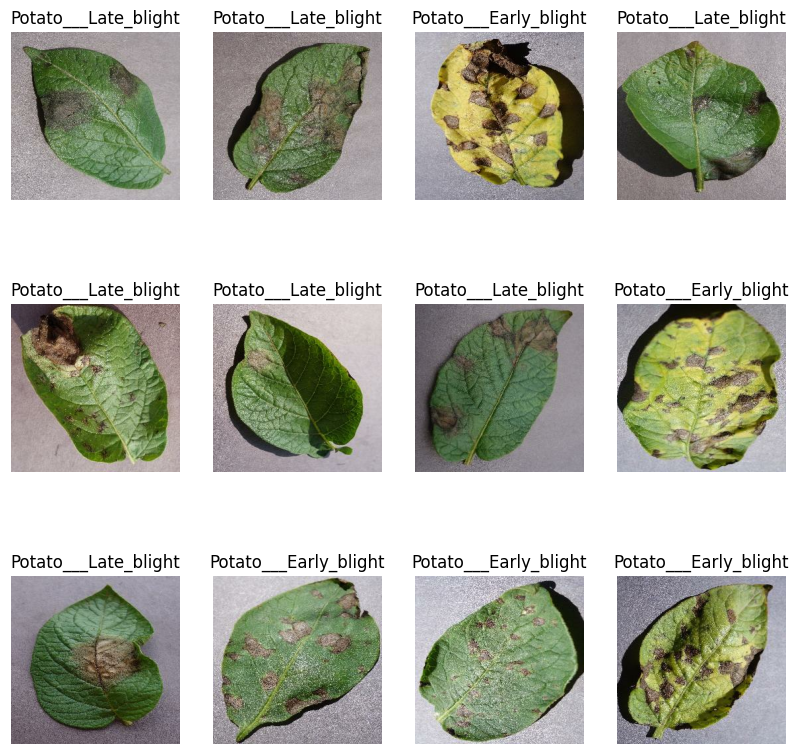

In [21]:
plt.figure(figsize =(10,10))
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [22]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split = 0.1,test_split=0.1,shuffle= True, shuffle_size = 10000):
    assert(train_split+val_split+test_split) ==1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds,val_ds,test_ds

In [23]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [30]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
num_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation = "relu",input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes,activation= 'softmax'),
])
model.build(input_shape = input_shape)

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 14, 14, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 12, 12, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 6, 6, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 4608)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572,931 (2.19 MB)

 Trainable params: 572,931 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 362s 6s/step - accuracy: 0.4372 - loss: 0.9328 - val_accuracy: 0.5469 - val_loss: 0.8611
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.6415 - loss: 0.7359 - val_accuracy: 0.8281 - val_loss: 0.4406
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.8248 - loss: 0.4519 - val_accuracy: 0.8438 - val_loss: 0.4585
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8464 - loss: 0.3849 - val_accuracy: 0.8698 - val_loss: 0.4289
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8655 - loss: 0.3220 - val_accuracy: 0.8438 - val_loss: 0.3741
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8741 - loss: 0.3274 - val_accuracy: 0.9531 - val_loss: 0.1588
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9110 - loss: 0.2145 - val_accuracy: 0.9271 - val_loss: 0.1803
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9352 - loss: 0.1574 - val_accuracy: 0.9583 - v

In [34]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9853 - loss: 0.0363


In [35]:
history

first image to predict
Actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
batch_label: Potato___healthy


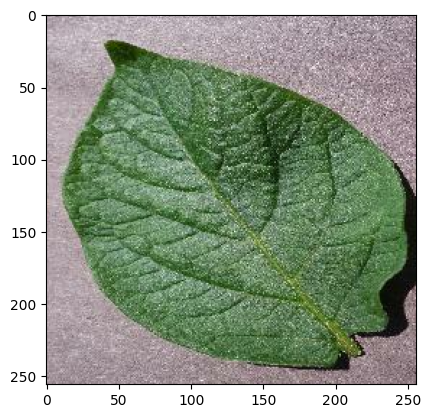

In [49]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_name[label_batch[0].numpy()])
    batch_prediction = model.predict(images_batch)
    print("batch_label:",class_name[np.argmax(batch_prediction[0])])

In [50]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


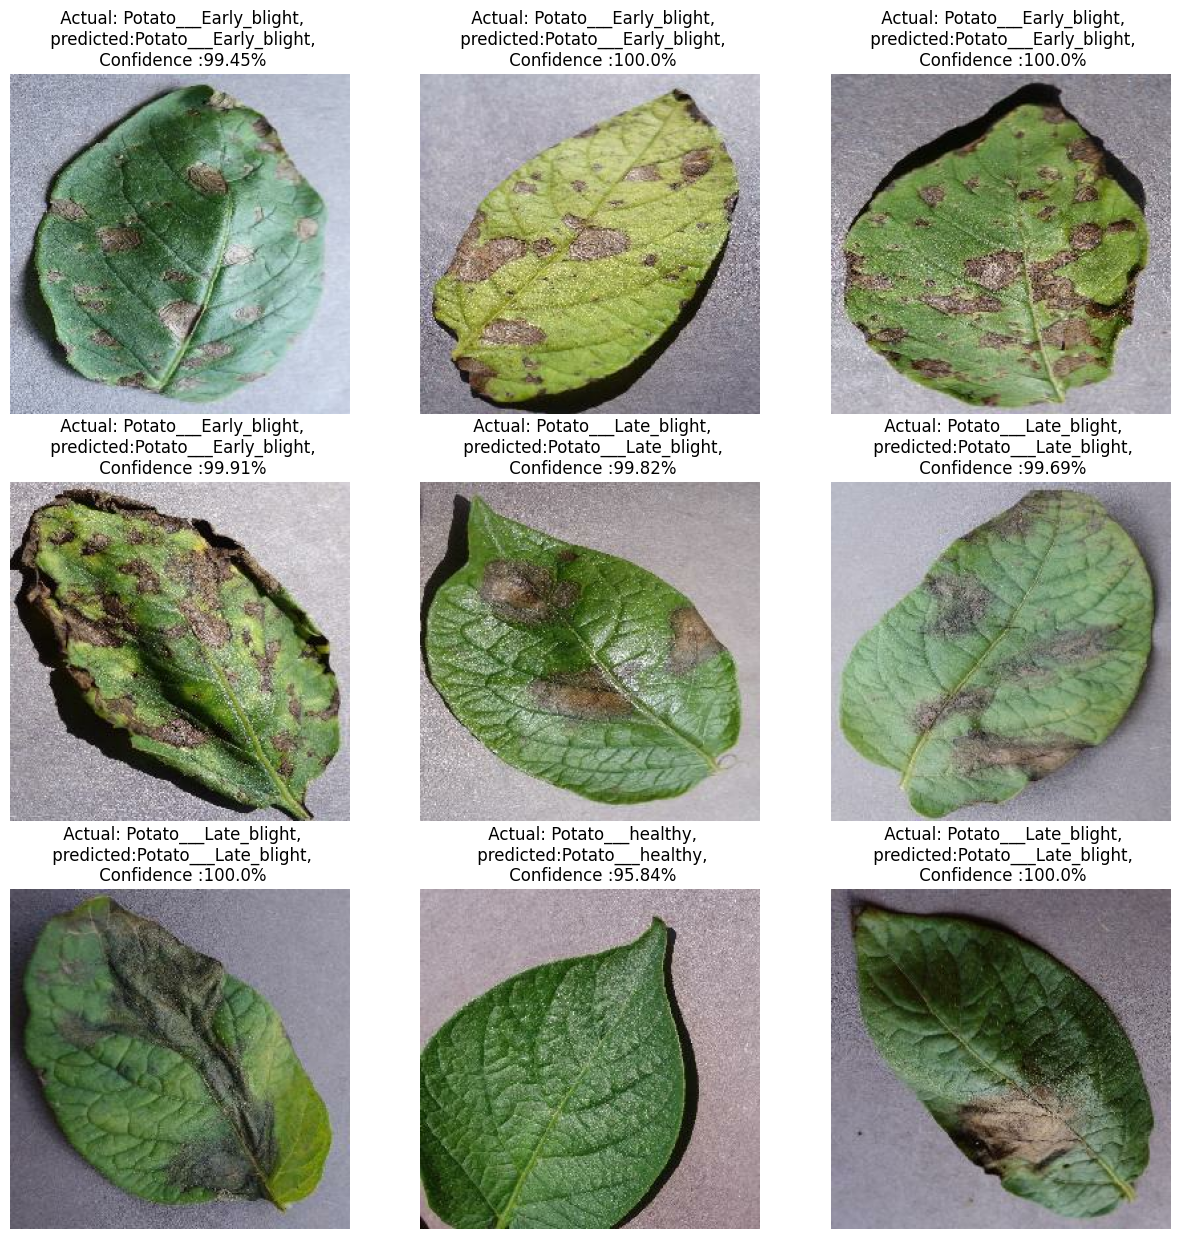

In [53]:
plt.figure(figsize =(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f" Actual: {actual_class},\n predicted:{predicted_class},\n Confidence :{confidence}%")
        plt.axis("off")

In [23]:
model.save("my_model.keras")